In [ ]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [ ]:
df = pd.read_csv("paste the link here")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [ ]:
#summary statistic of dataset
print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [ ]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

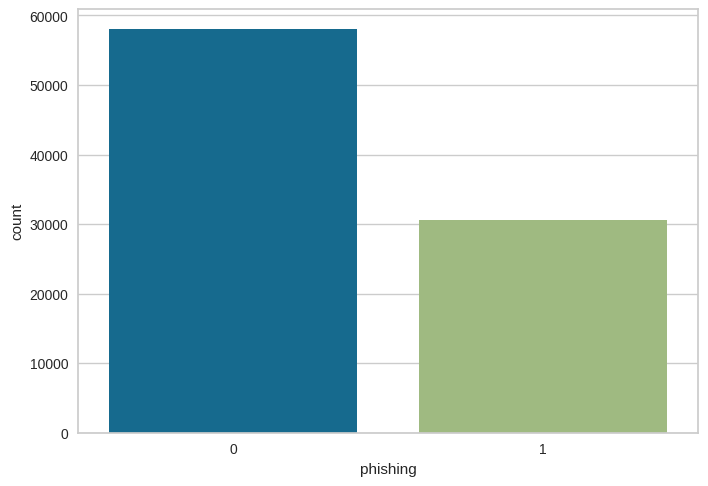

In [ ]:
#vizualize the given dataset
sns.countplot(x="phishing",data=df)
plt.show()

In [ ]:
cols_to_drop=['url_google_index','domain_google_index','server_client_domain','time_response','domain_spf','qty_ip_resolved','tld_present_params','qty_nameservers','qty_mx_servers','ttl_hostname','url_shortened']
df=df.drop(cols_to_drop,axis=1)

In [ ]:
extra_one=['qty_vowels_domain']
df=df.drop(extra_one,axis=1)

In [ ]:
rows,columns=df.shape
print("Numbr of rows ",rows)
print("Numbr of columns ",columns)

Numbr of rows  88647
Numbr of columns  100


# perform feature engineering on our dataset and will show it

In [ ]:


original_features = list(df.columns)

In [ ]:
original_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'domain_length',
 'domain_in_ip',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_sp

In [ ]:
dataset_array=np.array(df)

In [ ]:
print(dataset_array)

[[3 0 0 ... 0 0 1]
 [5 0 1 ... 1 0 1]
 [2 0 0 ... 1 0 0]
 ...
 [2 1 0 ... 1 0 1]
 [2 0 0 ... 1 0 1]
 [2 0 0 ... 0 0 0]]


In [ ]:
features_indices=[]
attributes=['url','domain','file','params']

In [ ]:
new_dataset={}

In [ ]:
for index,name in enumerate(original_features):
  if 'qty' in name and name.split('_')[-1] in attributes:
    features_indices.append([index,name.split('_')[-1]])
  else:
    new_dataset[name]=dataset_array[:,index]

In [ ]:


for index, attribute in features_indices:

  if attribute == 'domain':

    if f"qty_char_{attribute}" not in new_dataset.keys():

        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)

    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

In [ ]:
df1 = pd.DataFrame(new_dataset).astype(int)

In [ ]:
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,1,0,0,1,0,0,0,...,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,3,0,0,3,0,0,0,...,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,0,0,0,1,0,0,0,...,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,2,0,2,5,0,0,0,...,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,1,1,0,5,0,0,0,...,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,0,0,0,1,0,0,0,...,0,-1,0,47583,-1,-1,1,0,1,2


In [ ]:
df1.describe()

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,36.347615,18.560820,0.002267,-0.323666,-0.360813,-0.477997,0.713685,-0.535935,-0.528343,-0.532550,...,2.743793,5.273185,0.018331,31131.152763,3389.676661,352.043250,0.506447,0.343903,0.345720,1.985967
std,46.191590,6.598694,0.047564,0.899499,1.101398,0.682409,2.216137,0.498710,0.517986,0.551786,...,13.572252,34.937007,0.134147,45261.502645,3044.165723,598.264801,0.499961,0.783892,0.475605,0.836865
min,4.000000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,17.000000,14.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,13335.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,2.000000
50%,22.000000,18.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,20013.000000,3046.000000,168.000000,1.000000,0.000000,0.000000,2.000000
75%,38.000000,22.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,34922.000000,6423.000000,354.000000,1.000000,1.000000,1.000000,2.000000
max,4165.000000,231.000000,1.000000,19.000000,23.000000,17.000000,22.000000,0.000000,5.000000,43.000000,...,1232.000000,4094.000000,1.000000,395754.000000,17775.000000,22574.000000,1.000000,17.000000,1.000000,30.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming 'phishing' is the target variable
X = df1.drop('phishing', axis=1)  # Features
y = df1['phishing']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Creating the Random Forest model
rf_model.fit(X_train, y_train)  # Training the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9655386350817823


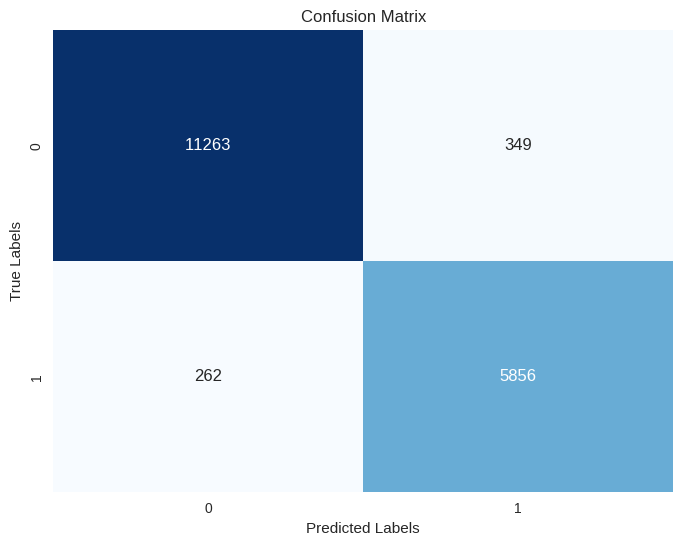

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()